In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *
import seaborn as sns
sns.set()

In [2]:
# Load all the data files
df1 = pd.read_csv('../Datasets/Raw/GlobalLandTemperaturesByCountry.csv')
df2 = pd.read_csv('../Datasets/Raw/CH4_Emissions.csv')
df3 = pd.read_csv('../Datasets/Raw/CO2_Emissions.csv')
df4 = pd.read_csv('../Datasets/Raw/HFCs_Emissions.csv')
df5 = pd.read_csv('../Datasets/Raw/MixofHFCsandPFC_Emissions.csv')
df6 = pd.read_csv('../Datasets/Raw/N20_Emissions.csv')
df7 = pd.read_csv('../Datasets/Raw/NF3_Emissions.csv')
df8 = pd.read_csv('../Datasets/Raw/PFC_Emissions.csv')
df9 = pd.read_csv('../Datasets/Raw/SF6_Emissions.csv')

In [3]:
df1.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [4]:
df1.rename(columns = {'dt': 'Date', 'AverageTemperature': 'AvgTemp', \
                      'AverageTemperatureUncertainty': 'AvgTempUncertainty'}, inplace = True)

In [5]:
df1.Date = pd.to_datetime(df1.Date)
df1.set_index('Date', inplace=True)

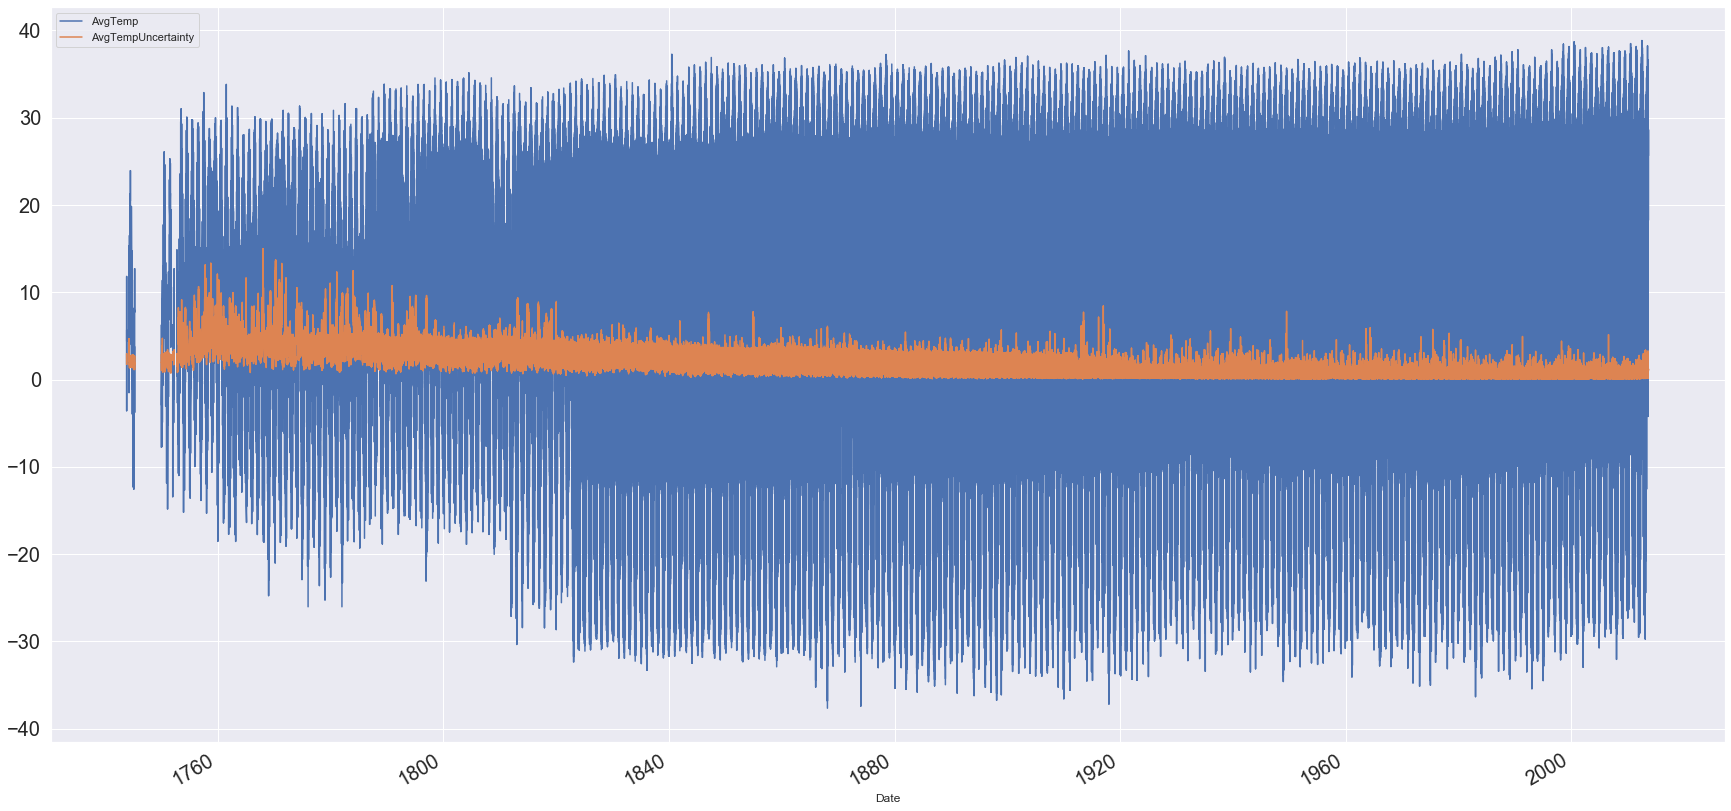

In [6]:
df1.plot(figsize = (30,15), fontsize=20)

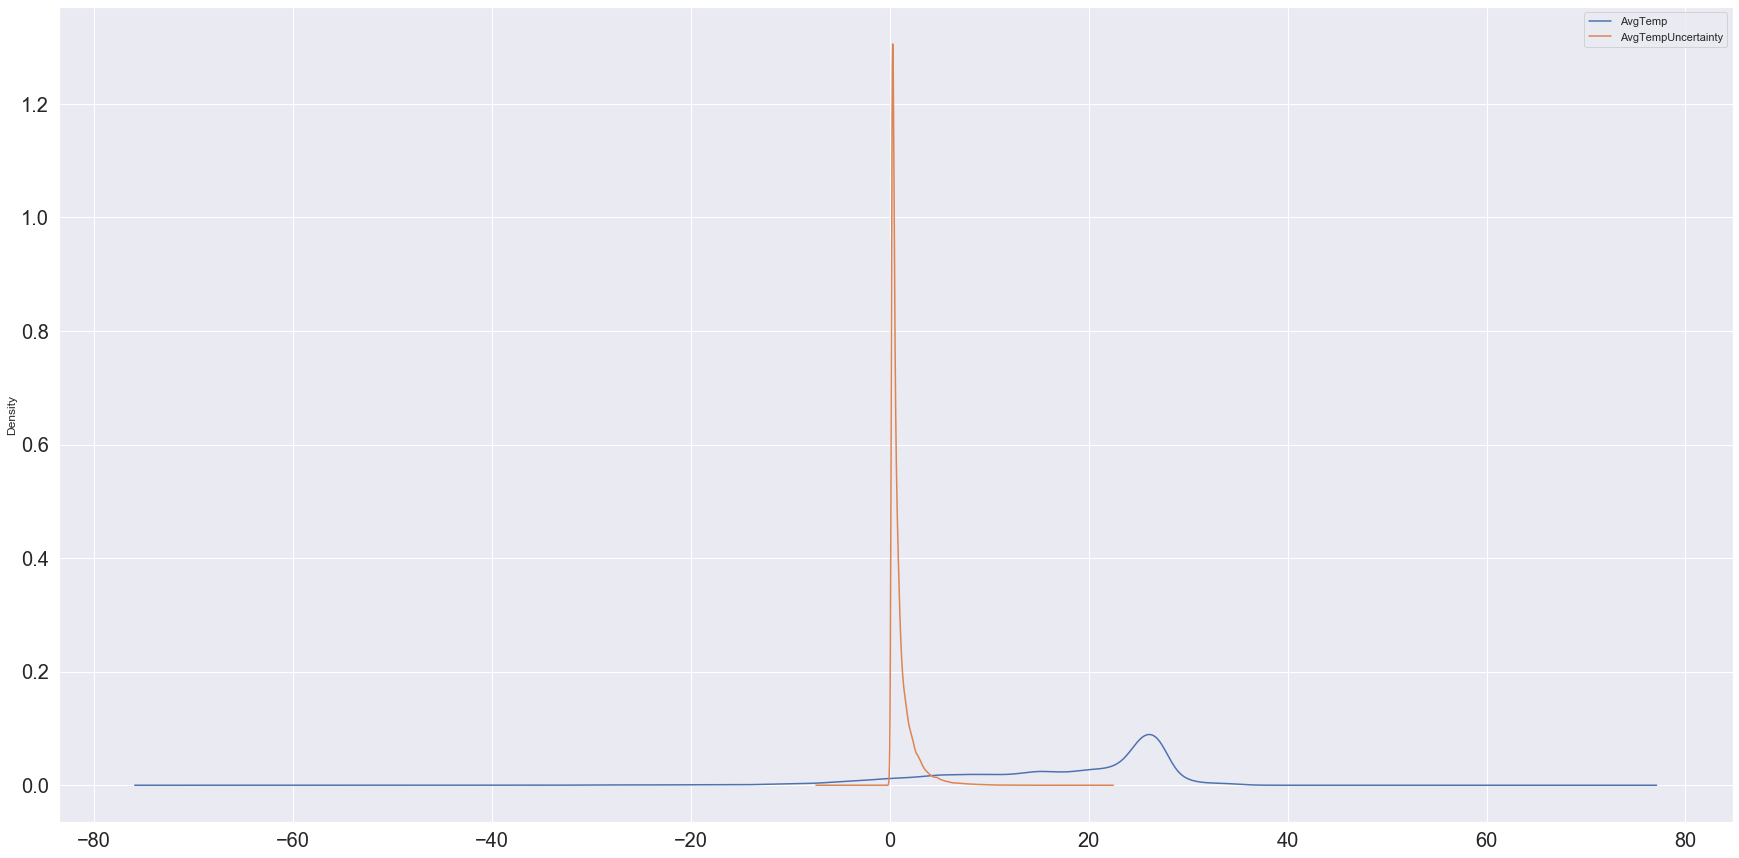

In [7]:
df1.plot(figsize = (30,15), fontsize=20, kind = 'kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ba80b10>,
      dtype=object)

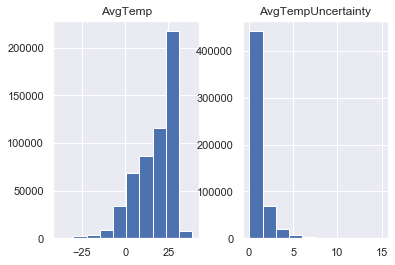

In [8]:
df1.hist()

In [9]:
# extract year, month and weekday from the date column
df1['Year'] = df1.index.year
df1['Month'] = df1.index.month
df1['WeekdayName'] = df1.index.day

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 577462 entries, 1743-11-01 to 2013-09-01
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   AvgTemp             544811 non-null  float64
 1   AvgTempUncertainty  545550 non-null  float64
 2   Country             577462 non-null  object 
 3   Year                577462 non-null  int64  
 4   Month               577462 non-null  int64  
 5   WeekdayName         577462 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 30.8+ MB


In [11]:
df1.dropna(inplace = True)

In [21]:
# Get yearly average temperature by country
df_AnnualAvg = df1.groupby(['Year','Country']).mean().rename(columns={'AvgTemp':'AnnualAvgTemp'}).reset_index()

In [22]:
df_AnnualAvg.head()

,Year,Country,AnnualAvgTemp,AvgTempUncertainty,Month,WeekdayName
0,1743,Albania,8.620,2.268,11.0,1.0
1,1743,Andorra,7.556,2.188,11.0,1.0
2,1743,Austria,2.482,2.116,11.0,1.0
3,1743,Belarus,0.767,2.465,11.0,1.0
4,1743,Belgium,7.106,1.855,11.0,1.0


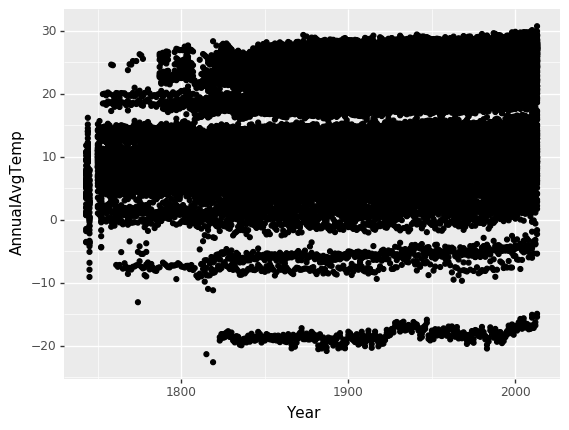

<ggplot: (7015144833)>


In [24]:
plt = ggplot(df_AnnualAvg, aes(x='Year', y = 'AnnualAvgTemp')) + geom_point()
print(plt)

In [27]:
# Resample to get yearly average
df1 = df1.resample('A').mean()
df1.rename(columns = {'AvgTemp': 'AnnualAvgTemp'}, inplace = True)
df1.index.rename('Year', inplace = True)
df1.index = df1.index.year

In [ ]:
df2.Year = pd.to_datetime(df2.Year, format='%Y')
df2.set_index('Year', inplace=True)

In [ ]:
df2.head()

In [ ]:
df2.plot(figsize = (30,15), marker='.', fontsize=20)